Lab 2

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

import sklearn.linear_model as lm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline

#1
titanic_df = pd.read_csv('/Users/nandy/Downloads/titanic.csv.bz2')
print(titanic_df.head())

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

The target variable is survived(0/1), pclass is a continuous variable and sex is Male/Female(categorical variable). Hence pclass needs to converted to a categorical variable.

In [89]:
#2
m1=smf.ols(formula='survived ~ C(pclass) + sex', data=titanic_df)
r1=m1.fit()
r1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     225.5
Date:                Wed, 11 Apr 2018   Prob (F-statistic):          7.79e-118
Time:                        21:00:48   Log-Likelihood:                -639.22
No. Observations:                1309   AIC:                             1286.
Df Residuals:                    1305   BIC:                             1307.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.8990      0.025     35.398      0.000       0.849       0.949
C(pclass)[T.2]    -0.1577      0.032     -4.872      0.000      -0.221      -0.094
C(pclass)[T.3]    -0.2926      0.027    -10.957      0.000      -0.345      -0.240
sex[T.male]       -0.5049      0.023    -21.974      0.000      -0.550      -0.460
==============================================================================
Omnibus:                       60.055   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.798
Skew:                           0.557   Prob(JB):                     1.90e-15
Kurtosis:                       2.961   Cond. No.                         5.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model has both the variables significant.  

0       0.898984
1       0.394113
2       0.898984
3       0.394113
4       0.898984
5       0.394113
6       0.898984
7       0.394113
8       0.898984
9       0.394113
10      0.394113
11      0.898984
12      0.898984
13      0.898984
14      0.394113
15      0.394113
16      0.394113
17      0.898984
18      0.898984
19      0.394113
20      0.394113
21      0.898984
22      0.394113
23      0.898984
24      0.898984
25      0.394113
26      0.394113
27      0.898984
28      0.898984
29      0.394113
          ...   
1279    0.606349
1280    0.101478
1281    0.101478
1282    0.101478
1283    0.101478
1284    0.101478
1285    0.101478
1286    0.606349
1287    0.101478
1288    0.101478
1289    0.101478
1290    0.606349
1291    0.101478
1292    0.101478
1293    0.101478
1294    0.101478
1295    0.101478
1296    0.101478
1297    0.101478
1298    0.101478
1299    0.101478
1300    0.606349
1301    0.101478
1302    0.101478
1303    0.101478
1304    0.606349
1305    0.606349
1306    0.1014

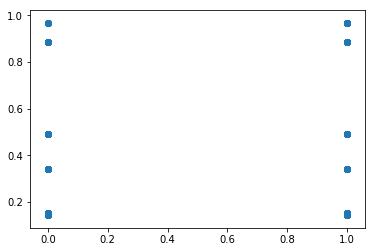

In [90]:
#3 
titanic_df['yhat']=r1.predict()
plt.scatter(titanic_df.survived,titanic_df.yhat)

print(titanic_df['yhat'])

yhat has the predicted survived value based on the linear model built with pclass and gender as variables. It has values between 0 & 1

In [91]:
#4 Max & Min values of predicted survival

print("Max: ",max(titanic_df.yhat))

print("Min: ",min(titanic_df.yhat))

Max:  0.9652777777777781
Min:  0.14619883040935722


No, the values lie between 0 and 1. They do not get the exact value of 0 / 1

In [92]:
#5 
titanic_df['yhat_new']=[1 if x >= 0.5 else 0 for x in titanic_df['yhat']]

temp1 = pd.DataFrame(pd.crosstab(titanic_df['survived'],titanic_df['yhat_new']))
print("Cross tab: \n",temp1)


accuracy = (temp1.iloc[0].iloc[0]+temp1.iloc[1].iloc[1])/titanic_df.pclass.count()
print("Accuracy: \n",accuracy)


Cross tab: 
 yhat_new    0    1
survived          
0         682  127
1         161  339
Accuracy: 
 0.7799847211611918


Accuracy of the model is 78%

In [93]:
#7
m1=smf.ols(formula='survived ~ C(pclass) * sex', data=titanic_df)
r1=m1.fit()
r1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     153.2
Date:                Wed, 11 Apr 2018   Prob (F-statistic):          4.02e-128
Time:                        21:03:11   Log-Likelihood:                -609.86
No. Observations:                1309   AIC:                             1232.
Df Residuals:                    1303   BIC:                             1263.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.9653      0.032     29.974      0.000       0.902       1.028
C(pclass)[T.2]                -0.0785      0.049     -1.587      0.113      -0.176       0.019
C(pclass)[T.3]                -0.4745      0.042    -11.414      0.000      -0.556      -0.393
sex[T.male]                   -0.6245      0.043    -14.436      0.000      -0.709      -0.540
C(pclass)[T.2]:sex[T.male]    -0.1161      0.064     -1.801      0.072      -0.243       0.010
C(pclass)[T.3]:sex[T.male]     0.2859      0.054      5.340      0.000       0.181       0.391
==============================================================================
Omnibus:                      113.251   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.526
Skew:                           0.805   Prob(JB):                     1.12e-31
Kurtosis:                       3.136   Cond. No.                         13.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#8
We find that the pclass 2 is not significant, but it was before. This model says that being Female & 1st class(intercept) has high chances of survival. 
Being Male and in class 1 has slightly better chance of survival. 
Female and in class 2 & 3, have low chances of survival


In [97]:
#9
titanic_df['yhat']=r1.predict()

titanic_df['yhat_new']=[1 if x >= 0.5 else 0 for x in titanic_df['yhat']]

temp1 = pd.DataFrame(pd.crosstab(titanic_df['survived'],titanic_df['yhat_new']))
print("Cross tab: \n",temp1)

accuracy = (temp1.iloc[0].iloc[0]+temp1.iloc[1].iloc[1])/titanic_df.pclass.count()
print("Accuracy: \n",accuracy)


Cross tab: 
 yhat_new    0    1
survived          
0         792   17
1         267  233
Accuracy: 
 0.7830404889228418


Accuracy has increased by 1 percent after including the interaction variables.